In [51]:
from IPython.display import Markdown, display
display(Markdown("header-project.md"))

header-project.md

## **Projet step 01: descriptive stats and data cleaning**

In order to prepare the data science project that will need to complete, gather in project group and answer the following questions:

The project will use the `california_houses.csv`.
In this dataset, **each row of the dataset represents one district in California**.


 - Load the dataset
 - For **each** column, print out descriptive statistics (including distributions, etc.) that you find relevant to get to know the data
 - Identify and fix issues in the dataset (spoiler alert: there are many!)
 - Create a categorical  variable \<Closest_city> indicating the closest CA city and drop the distance to each city (not needed)
 - Describe **each** column with a descriptive sentence
 - Save your clean dataset as a csv file
 - Using a library such as `geopandas` or `plotly`, plot the location of districts on a map
 - Using the function you wrote in the first two sessions, perform a descriptive analysis of each variable independently.

In [77]:
import geopandas as gpd

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

In [79]:
df = pd.read_csv("california_houses_mod.csv")
df

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252        41.0      880.0         129.0   
1                358500.0         8.3014        21.0     7099.0        1106.0   
2                352100.0         7.2574        52.0     1467.0         190.0   
3                341300.0         5.6431        52.0     1274.0         235.0   
4                342200.0         3.8462        52.0     1627.0         280.0   
...                   ...            ...         ...        ...           ...   
20649            113600.0         3.3162        27.0     1781.0         441.0   
20650            214600.0         6.0891         5.0     1619.0         272.0   
20651            119000.0         2.5388        15.0     3273.0         895.0   
20652            225000.0         2.8798         6.0     1495.0         552.0   
20653             75000.0         4.0000        36.0       48.0          12.0   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0           322.0       126.0     37.88    -122.23        9263.040773   
1          2401.0      1138.0     37.86    -122.22       10225.733072   
2           496.0       177.0     37.85    -122.24        8259.085109   
3           558.0       219.0     37.85    -122.25        7768.086571   
4           565.0       259.0     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20649       759.0       340.0     33.78    -116.47      106996.992219   
20650      1063.0       296.0     32.91    -117.16        9823.595763   
20651      1872.0       842.0     32.85    -116.93       29578.864714   
20652      1087.0       557.0     37.33    -121.89       22935.306685   
20653        27.0         8.0     37.33    -121.29       68064.090985   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       556529.158342         735501.806984         67432.517001   
1       554279.850069         733236.884360         65049.908574   
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
...               ...                   ...                  ...   
20649   166441.349879         134664.038941        629844.770098   
20650   161963.442905          21601.410086        653596.100510   
20651   180897.510000          26259.911336        672575.941687   
20652   491108.971219         669627.294557           665.565994   
20653   456581.636394         635928.492033         53319.567502   

       Distance_to_SanFrancisco  Tot_No_Bedrooms  Max_Age  
0                  21250.213767            751.0     50.0  
1                  20880.600400           5993.0     34.0  
2                  18811.487450           1277.0     66.0  
3                  18031.047568           1039.0     63.0  
4                  18031.047568           1347.0     68.0  
...                         ...              ...      ...  
20649             697175.812031           1340.0     40.0  
20650             721610.303036           1347.0     27.0  
20651             740609.168959           2378.0     34.0  
20652              68659.580549            943.0     27.0  
20653             112069.416753             36.0     50.0  

[20654 rows x 16 columns]

In [80]:
# We used the describe function to understand the statistical description of the data. The initial observation is shown below.

# There are missing counts in the columns of 'Median_Income', 'Median_age', 'Tot_Rooms' and 'Tot_Bedrooms.'
# In 'Median_Income' column, the minimal value is negative and the mean and std are both abnormally high.
# In 'Median_Age' column, there is a minimal value of 1.000000.
# There are negative values in the 'Household' column.
# We suspected that the columns of 'Tot_No_Bedrooms' and 'Max_Age' are either irrelevant or columns with low significance.

df.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20654.000000   20654.000000  20607.000000  20607.000000   
mean        206859.008521      74.185471     28.638230   2635.554472   
std         115391.970967    5925.379749     12.591488   2180.774851   
min          14999.000000     -55.091700      1.000000      2.000000   
25%         119600.000000       2.562500     18.000000   1447.500000   
50%         179700.000000       3.534700     29.000000   2127.000000   
75%         264700.000000       4.743700     37.000000   3147.500000   
max         500001.000000  584062.237200     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20607.000000  20654.000000  20654.000000  20654.000000  20654.000000   
mean     537.748338   1425.302411    499.375666     35.631504   -119.569465   
std      421.068876   1132.221567    382.344011      2.135876      2.003603   
min        1.000000      3.000000    -98.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count       20654.000000    2.065400e+04          2.065400e+04   
mean        40499.168256    2.693968e+05          3.981210e+05   
std         49130.495010    2.477182e+05          2.893975e+05   
min           120.676447    4.205891e+02          4.849180e+02   
25%          9079.756762    3.211125e+04          1.594146e+05   
50%         20521.624925    1.736264e+05          2.146241e+05   
75%         49824.747685    5.271382e+05          7.057935e+05   
max        333804.686371    1.018260e+06          1.196919e+06   

       Distance_to_SanJose  Distance_to_SanFrancisco  Tot_No_Bedrooms  \
count         20654.000000              20654.000000     20654.000000   
mean         349205.216365             386711.388384      2097.530551   
std          217173.597449             250143.860258      1796.213255   
min             569.448118                456.141313         0.000000   
25%          113072.904889             117332.993656      1126.000000   
50%          459800.789707             526561.271568      1681.000000   
75%          516946.490963             584562.195811      2509.000000   
max          836762.678210             903627.663298     33110.000000   

            Max_Age  
count  20654.000000  
mean      43.153239  
std       12.947424  
min        9.000000  
25%       33.000000  
50%       43.000000  
75%       52.000000  
max       76.000000

In [81]:
# After using the function .info(), we found that there are some missing values in the columns of 'Median_Income', 'Median_age', 'Tot_Rooms' and 'Tot_Bedrooms.'
# It also shows that all the columns in the dataframe belongs to the type of 'float.'

df.info()
#20654-20607=47 Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20654 entries, 0 to 20653
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20654 non-null  float64
 1   Median_Income             20654 non-null  float64
 2   Median_Age                20607 non-null  float64
 3   Tot_Rooms                 20607 non-null  float64
 4   Tot_Bedrooms              20607 non-null  float64
 5   Population                20654 non-null  float64
 6   Households                20654 non-null  float64
 7   Latitude                  20654 non-null  float64
 8   Longitude                 20654 non-null  float64
 9   Distance_to_coast         20654 non-null  float64
 10  Distance_to_LA            20654 non-null  float64
 11  Distance_to_SanDiego      20654 non-null  float64
 12  Distance_to_SanJose       20654 non-null  float64
 13  Distance_to_SanFrancisco  20654 non-null  float64
 14  Tot_No

In [82]:
# There are 14 duplicated rows in the original dataframe.

print(df.duplicated().sum())

14


In [83]:
# Rows that are duplicated and without values are dropped with the codes below.

df=df.dropna()
df.drop_duplicates(inplace=True)
df

C:\Users\romai\AppData\Local\Temp\ipykernel_6708\1647474555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252        41.0      880.0         129.0   
1                358500.0         8.3014        21.0     7099.0        1106.0   
2                352100.0         7.2574        52.0     1467.0         190.0   
3                341300.0         5.6431        52.0     1274.0         235.0   
4                342200.0         3.8462        52.0     1627.0         280.0   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603        25.0     1665.0         374.0   
20636             77100.0         2.5568        18.0      697.0         150.0   
20637             92300.0         1.7000        17.0     2254.0         485.0   
20638             84700.0         1.8672        18.0     1860.0         409.0   
20639             89400.0         2.3886        16.0     2785.0         616.0   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0           322.0       126.0     37.88    -122.23        9263.040773   
1          2401.0      1138.0     37.86    -122.22       10225.733072   
2           496.0       177.0     37.85    -122.24        8259.085109   
3           558.0       219.0     37.85    -122.25        7768.086571   
4           565.0       259.0     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635       845.0       330.0     39.48    -121.09      162031.481121   
20636       356.0       114.0     39.49    -121.21      160445.433537   
20637      1007.0       433.0     39.43    -121.22      153754.341182   
20638       741.0       349.0     39.43    -121.32      152005.022239   
20639      1387.0       530.0     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       556529.158342         735501.806984         67432.517001   
1       554279.850069         733236.884360         65049.908574   
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
...               ...                   ...                  ...   
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  Tot_No_Bedrooms  Max_Age  
0                  21250.213767            751.0     50.0  
1                  20880.600400           5993.0     34.0  
2                  18811.487450           1277.0     66.0  
3                  18031.047568           1039.0     63.0  
4                  18031.047568           1347.0     68.0  
...                         ...              ...      ...  
20635             222619.890417           1291.0     41.0  
20636             218314.424634            547.0     32.0  
20637             212097.936232           1769.0     35.0  
20638             207923.199166           1451.0     32.0  
20639             205473.376575           2169.0     32.0  

[20593 rows x 16 columns]

In [84]:
# The negative values are deleted according to our previous findings.

drop_neg=['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco']
negatives=0
for ind, row in df.iterrows():
    for column in drop_neg:
        if row[column]<0:
            negatives+=1
            df=df.drop(index=ind)
print(negatives)
df

16


Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252        41.0      880.0         129.0   
1                358500.0         8.3014        21.0     7099.0        1106.0   
2                352100.0         7.2574        52.0     1467.0         190.0   
3                341300.0         5.6431        52.0     1274.0         235.0   
4                342200.0         3.8462        52.0     1627.0         280.0   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603        25.0     1665.0         374.0   
20636             77100.0         2.5568        18.0      697.0         150.0   
20637             92300.0         1.7000        17.0     2254.0         485.0   
20638             84700.0         1.8672        18.0     1860.0         409.0   
20639             89400.0         2.3886        16.0     2785.0         616.0   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0           322.0       126.0     37.88    -122.23        9263.040773   
1          2401.0      1138.0     37.86    -122.22       10225.733072   
2           496.0       177.0     37.85    -122.24        8259.085109   
3           558.0       219.0     37.85    -122.25        7768.086571   
4           565.0       259.0     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635       845.0       330.0     39.48    -121.09      162031.481121   
20636       356.0       114.0     39.49    -121.21      160445.433537   
20637      1007.0       433.0     39.43    -121.22      153754.341182   
20638       741.0       349.0     39.43    -121.32      152005.022239   
20639      1387.0       530.0     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       556529.158342         735501.806984         67432.517001   
1       554279.850069         733236.884360         65049.908574   
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
...               ...                   ...                  ...   
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  Tot_No_Bedrooms  Max_Age  
0                  21250.213767            751.0     50.0  
1                  20880.600400           5993.0     34.0  
2                  18811.487450           1277.0     66.0  
3                  18031.047568           1039.0     63.0  
4                  18031.047568           1347.0     68.0  
...                         ...              ...      ...  
20635             222619.890417           1291.0     41.0  
20636             218314.424634            547.0     32.0  
20637             212097.936232           1769.0     35.0  
20638             207923.199166           1451.0     32.0  
20639             205473.376575           2169.0     32.0  

[20577 rows x 16 columns]

In [85]:
# For better comprehension, we reduced the unnecessary decimal places on the 'Median_Income' column. 
# The decimal places in the columns about distances are kept for accuracy in the later parts.

clean=['Median_House_Value', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households']

df['Median_Income'] = df['Median_Income'].round(2)

for i in clean:
    df[i] = df[i].astype(int)
df

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                  452600           8.33          41        880           129   
1                  358500           8.30          21       7099          1106   
2                  352100           7.26          52       1467           190   
3                  341300           5.64          52       1274           235   
4                  342200           3.85          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635               78100           1.56          25       1665           374   
20636               77100           2.56          18        697           150   
20637               92300           1.70          17       2254           485   
20638               84700           1.87          18       1860           409   
20639               89400           2.39          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             322         126     37.88    -122.23        9263.040773   
1            2401        1138     37.86    -122.22       10225.733072   
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       556529.158342         735501.806984         67432.517001   
1       554279.850069         733236.884360         65049.908574   
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
...               ...                   ...                  ...   
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  Tot_No_Bedrooms  Max_Age  
0                  21250.213767            751.0     50.0  
1                  20880.600400           5993.0     34.0  
2                  18811.487450           1277.0     66.0  
3                  18031.047568           1039.0     63.0  
4                  18031.047568           1347.0     68.0  
...                         ...              ...      ...  
20635             222619.890417           1291.0     41.0  
20636             218314.424634            547.0     32.0  
20637             212097.936232           1769.0     35.0  
20638             207923.199166           1451.0     32.0  
20639             205473.376575           2169.0     32.0  

[20577 rows x 16 columns]

In [86]:
# Here is the updated statistical description of our dataframe, before taking out the outliers.

df.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20577.000000   20577.000000  20577.000000  20577.000000   
mean        206868.914711      74.476403     28.645429   2636.331438   
std         115404.415826    5936.454418     12.589267   2181.712120   
min          14999.000000       0.500000      1.000000      2.000000   
25%         119600.000000       2.560000     18.000000   1448.000000   
50%         179700.000000       3.540000     29.000000   2127.000000   
75%         264700.000000       4.740000     37.000000   3148.000000   
max         500001.000000  584062.240000     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20577.000000  20577.000000  20577.000000  20577.000000  20577.000000   
mean     537.862468   1425.218739    499.479322     35.632481   -119.569958   
std      421.221537   1132.064127    382.272825      2.136471      2.003974   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1724.000000    604.000000     37.720000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count       20577.000000    2.057700e+04          2.057700e+04   
mean        40512.313886    2.695227e+05          3.982440e+05   
std         49148.012005    2.477670e+05          2.894580e+05   
min           120.676447    4.205891e+02          4.849180e+02   
25%          9079.756762    3.211125e+04          1.594027e+05   
50%         20520.738927    1.737536e+05          2.147783e+05   
75%         49828.432910    5.272870e+05          7.059167e+05   
max        333804.686371    1.018260e+06          1.196919e+06   

       Distance_to_SanJose  Distance_to_SanFrancisco  Tot_No_Bedrooms  \
count         20577.000000              20577.000000     20577.000000   
mean         349180.185262             386654.747252      2098.468970   
std          217176.532775             250169.282781      1796.680386   
min             569.448118                456.141313         0.000000   
25%          113130.369443             117234.394930      1126.000000   
50%          459758.877000             526546.661701      1682.000000   
75%          516955.999126             584604.086179      2509.000000   
max          836762.678210             903627.663298     33110.000000   

            Max_Age  
count  20577.000000  
mean      43.161637  
std       12.949512  
min        9.000000  
25%       33.000000  
50%       43.000000  
75%       52.000000  
max       76.000000

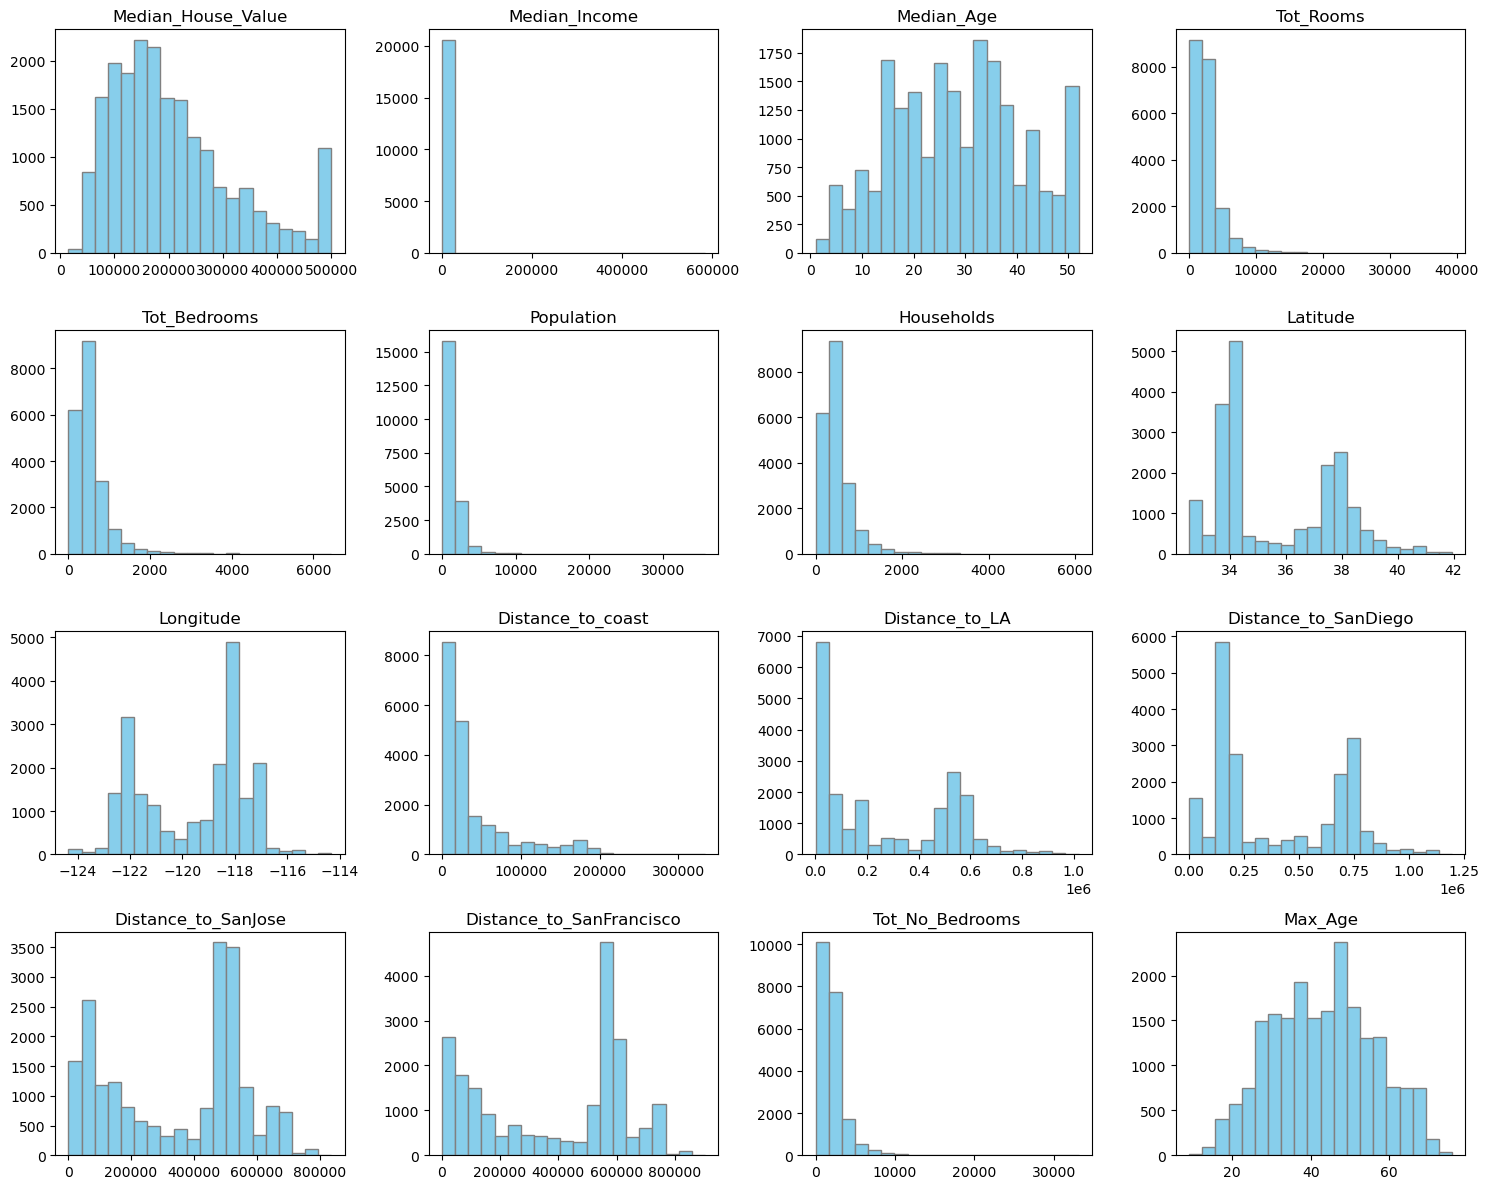

In [87]:
# Below are charts before removing the outliers.
# Charts, such as Median Income, Tot Rooms, and Households, do not show the entire pictures, since there are many outliers existed with minimal values in count.
# We can see that there are non relevant values that prevent us for having acurate hist
# Therefore, we suggest removing the outliers and making another plots afterward.

fig, ax = plt.subplots(4, 4, figsize=(15, 12))

ax = ax.ravel()

for i, column in enumerate(list(df.columns)):
    ax[i].hist(df[column], bins=20, edgecolor='gray', color='skyblue')
    ax[i].set_title(column)

plt.tight_layout()
plt.show()

In [89]:
# To remove the outliers, we adopt the interquartile range to figure out and drop the outliers.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3)
print(IQR)

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_out


Median_House_Value          119600.000000
Median_Income                    2.560000
Median_Age                      18.000000
Tot_Rooms                     1448.000000
Tot_Bedrooms                   295.000000
Population                     787.000000
Households                     280.000000
Latitude                        33.930000
Longitude                     -121.800000
Distance_to_coast             9079.756762
Distance_to_LA               32111.253908
Distance_to_SanDiego        159402.700850
Distance_to_SanJose         113130.369443
Distance_to_SanFrancisco    117234.394930
Tot_No_Bedrooms               1126.000000
Max_Age                         33.000000
Name: 0.25, dtype: float64 Median_House_Value          264700.000000
Median_Income                    4.740000
Median_Age                      37.000000
Tot_Rooms                     3148.000000
Tot_Bedrooms                   647.000000
Population                    1724.000000
Households                     604.000000
Latitud

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
2                  352100           7.26          52       1467           190   
3                  341300           5.64          52       1274           235   
4                  342200           3.85          52       1627           280   
5                  269700           4.04          52        919           213   
6                  299200           3.66          52       2535           489   
...                   ...            ...         ...        ...           ...   
20620              100000           4.56          40        198            41   
20621               77500           2.37          37       1244           247   
20622               67000           2.42          20        755           147   
20623               65500           2.82          32       1158           244   
20624               87200           3.07          16       1698           300   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
5             413         193     37.85    -122.25        7768.086571   
6            1094         514     37.84    -122.25        6843.020847   
...           ...         ...       ...        ...                ...   
20620         151          48     39.05    -121.48      108166.203802   
20621         484         157     39.01    -121.47      103860.587616   
20622         457         157     39.00    -121.44      103134.691666   
20623         598         227     39.03    -121.37      107522.163430   
20624         731         291     39.04    -121.41      107951.699080   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
5       555194.266086         734095.290744         65287.138412   
6       554364.406936         733249.808578         64315.991742   
...               ...                   ...                  ...   
20620   626302.004631         804406.168570        194032.118969   
20621   621981.541440         800129.101236        189833.980767   
20622   619767.711959         797862.934569        189275.200124   
20623   619866.567405         797739.784365        193887.229202   
20624   622463.673999         800418.835793        194177.529444   

       Distance_to_SanFrancisco  Tot_No_Bedrooms  Max_Age  
2                  18811.487450           1277.0     66.0  
3                  18031.047568           1039.0     63.0  
4                  18031.047568           1347.0     68.0  
5                  18031.047568            706.0     69.0  
6                  17538.209972           2046.0     65.0  
...                         ...              ...      ...  
20620             164320.362165            157.0     53.0  
20621             160959.293735            997.0     59.0  
20622             161398.252182            608.0     36.0  
20623             167504.669651            914.0     49.0  
20624             166541.476019           1398.0     25.0  

[15298 rows x 16 columns]

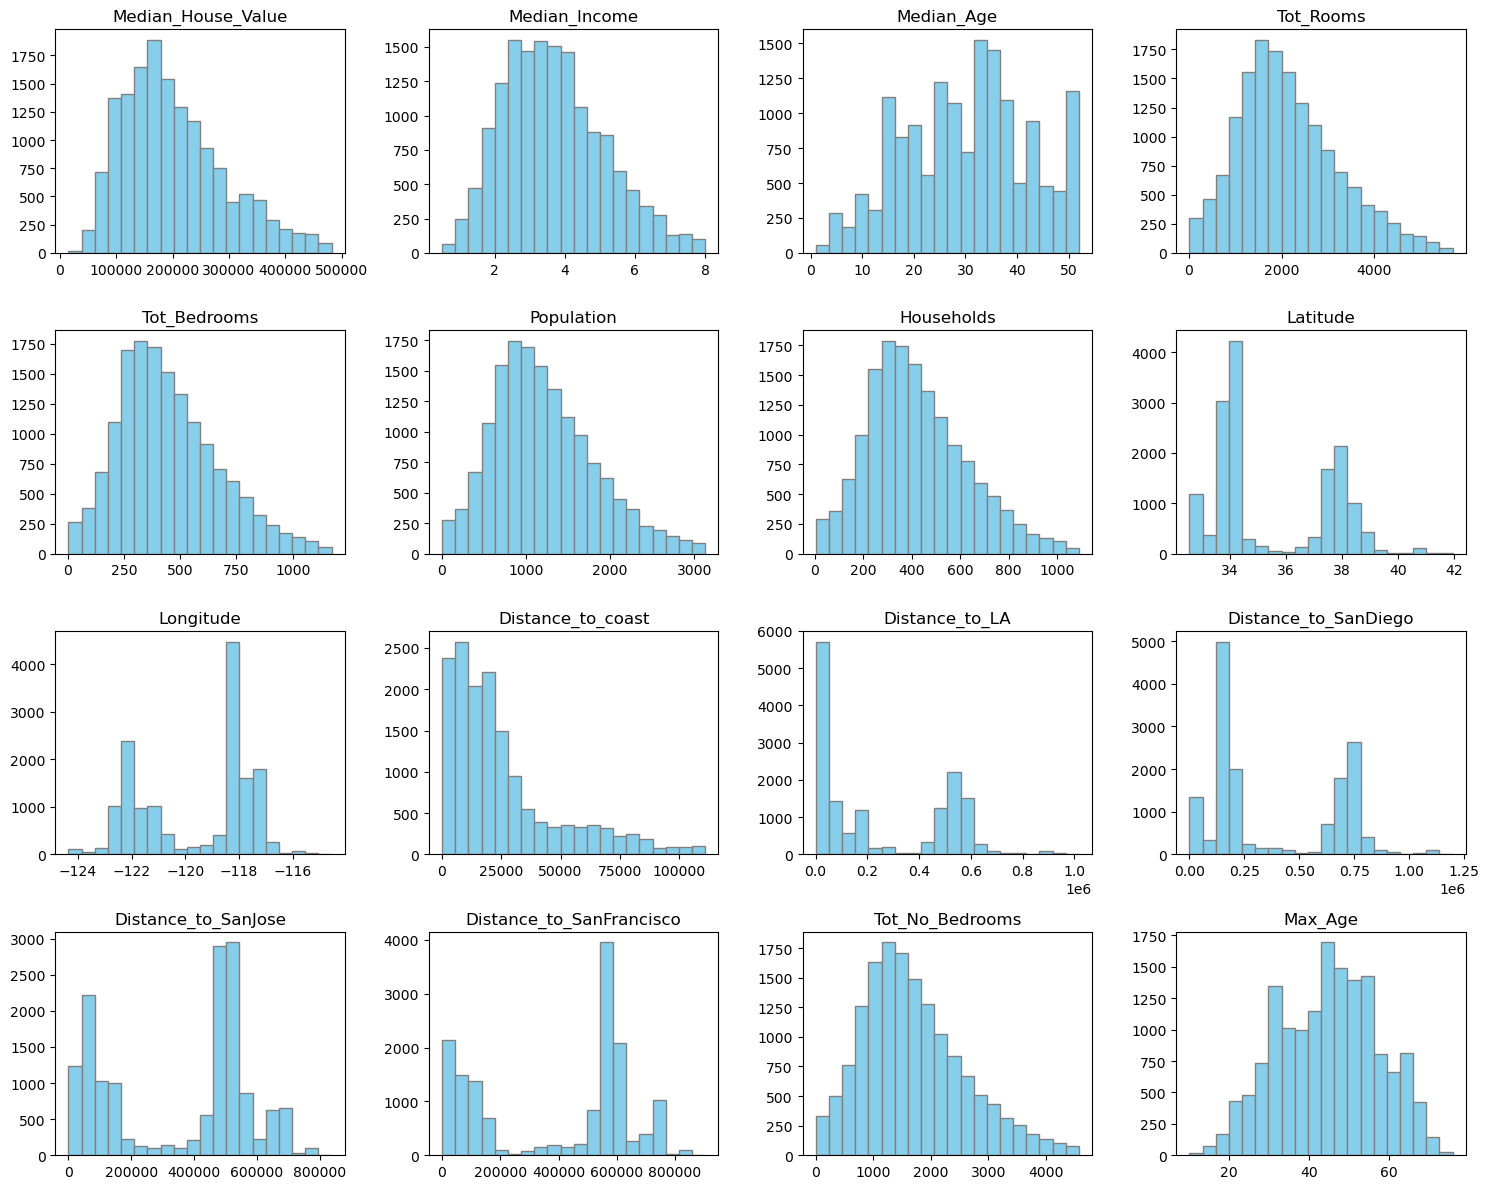

In [90]:
# After removing the outliers, we can better understand the variables in the dataframe.
# For Median House Value, most values are in the range of 90,000 to 200,000 in which value of approx. 150,000 take the most number of count.
# The Median Income generally spreads from 2.2 to 4.
# The Median Age is more evenly distributed. Several median ages spike, such as 16, 26, 34-36 and 50.
# The distribution of the Tot Rooms peaks at approx. 1,500 and drop gradually afterwards.
# The distribution pattern of Tot Bedrooms is similar to that of Tot Rooms and peaks at 300 before dropping gradually.
# The Population and Households have similar distribution patterns as well. The majority of the former is in between 700 and 1100, while the latter is between 260 and 420.
# In the data, most districts have a relatively short distance to close as the count concentrates at the start of the chart, from 0 to 25,000.
# Regarding the Tot No Bedroom and Max Age, we will explain in the later session regarding the correlation.

fig, ax = plt.subplots(4, 4, figsize=(15, 12))

ax = ax.ravel()

for i, column in enumerate(list(df_out.columns)):
    ax[i].hist(df_out[column], bins=20, edgecolor='gray', color='skyblue')
    ax[i].set_title(column)

plt.tight_layout()
plt.show()

In [91]:
# For the distances to Californian cities, there are more districts that are close to Los Angeles, with around 7,000, followed by San Francisco, San Jose and San Diego.
# Here, we try to map the district according to the closest city.

cities=["LA","SD","SJ","SF"]
columns_c=["Distance_to_LA","Distance_to_SanDiego","Distance_to_SanJose","Distance_to_SanFrancisco"]
for ind,row in df_out.iterrows():
    min1=float("inf")
    city_name=""
    for i in columns_c:
        if row[i]<min1:
            min1=row[i]
            city_name=i
    df_out.loc[ind,"Closest_city"]=cities[columns_c.index(city_name)]
df_out.head()

C:\Users\romai\AppData\Local\Temp\ipykernel_6708\3472617775.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.loc[ind,"Closest_city"]=cities[columns_c.index(city_name)]


Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
2              352100           7.26          52       1467           190   
3              341300           5.64          52       1274           235   
4              342200           3.85          52       1627           280   
5              269700           4.04          52        919           213   
6              299200           3.66          52       2535           489   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   
5         413         193     37.85    -122.25        7768.086571   
6        1094         514     37.84    -122.25        6843.020847   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   
5   555194.266086         734095.290744         65287.138412   
6   554364.406936         733249.808578         64315.991742   

   Distance_to_SanFrancisco  Tot_No_Bedrooms  Max_Age Closest_city  
2              18811.487450           1277.0     66.0           SF  
3              18031.047568           1039.0     63.0           SF  
4              18031.047568           1347.0     68.0           SF  
5              18031.047568            706.0     69.0           SF  
6              17538.209972           2046.0     65.0           SF

In [92]:
# The count of the closest city is shown with the code below.

df_out["Closest_city"].value_counts()

LA    7592
SF    3753
SJ    2330
SD    1623
Name: Closest_city, dtype: int64

In [93]:
# As instrcuted, we change the column of the closest city to categorical data.

df_out["Closest_city"]=df_out["Closest_city"].astype("category")

C:\Users\romai\AppData\Local\Temp\ipykernel_6708\235345525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out["Closest_city"]=df_out["Closest_city"].astype("category")


In [95]:
# The cleaned dataframe is output and saved.

df_out.to_csv("Group_7_california_houses_mod.csv",index=False)

C:\Users\romai\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


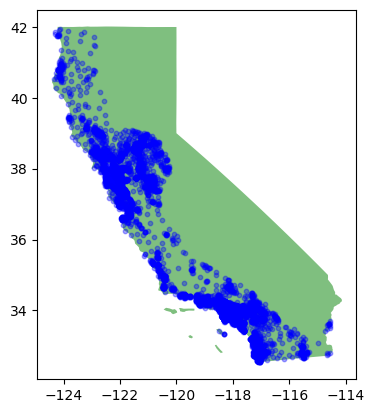

In [96]:
# With geopandas, we map the district distribution on the state of California.

wc = gpd.read_file("Group_7_california_houses_mod.csv")
districts = gpd.GeoDataFrame(wc, geometry=gpd.points_from_xy(wc.Longitude, wc.Latitude))
states = gpd.read_file('cb_2018_us_state_20m.shp')

california = states[states['NAME'] == 'California']

california.crs = {'init':"epsg:4326"}
districts.crs = {'init':"epsg:4326"}

ax = california.plot(alpha=0.5, color='green', zorder=1)
ax = districts.plot(ax = ax, markersize = 10,alpha=0.35, color = "blue", marker = 'o', zorder=3)


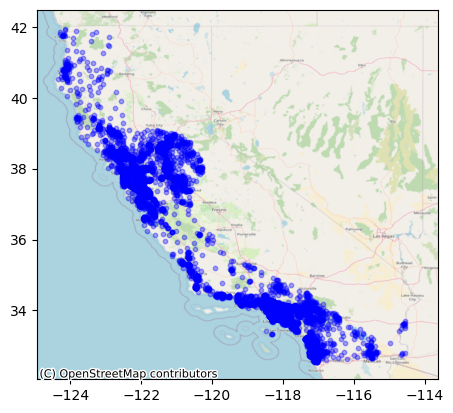

In [97]:
# We also put the district distribution on the map showing the west coast of the US.

ax = california.plot(alpha=0.0, color='green', zorder=1)
ax = districts.plot(ax = ax, markersize = 10,alpha=0.35, color = "blue", marker = 'o', zorder=3)

ctx.add_basemap(ax, crs=districts.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

## **[GROUP WORK] Project step 02: multivariate staisticss**

In order to prepare the data science project that will need to complete, gather in project group and answer the following questions:

Start from your clean data set (from yesterday)


In [1]:
# We used the newly saved csv file and put it as df2 for working in this session.

In [116]:
df2=pd.read_csv("Group_7_california_houses_mod.csv")

In [117]:
df2

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                  352100           7.26          52       1467           190   
1                  341300           5.64          52       1274           235   
2                  342200           3.85          52       1627           280   
3                  269700           4.04          52        919           213   
4                  299200           3.66          52       2535           489   
...                   ...            ...         ...        ...           ...   
15293              100000           4.56          40        198            41   
15294               77500           2.37          37       1244           247   
15295               67000           2.42          20        755           147   
15296               65500           2.82          32       1158           244   
15297               87200           3.07          16       1698           300   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             496         177     37.85    -122.24        8259.085109   
1             558         219     37.85    -122.25        7768.086571   
2             565         259     37.85    -122.25        7768.086571   
3             413         193     37.85    -122.25        7768.086571   
4            1094         514     37.84    -122.25        6843.020847   
...           ...         ...       ...        ...                ...   
15293         151          48     39.05    -121.48      108166.203802   
15294         484         157     39.01    -121.47      103860.587616   
15295         457         157     39.00    -121.44      103134.691666   
15296         598         227     39.03    -121.37      107522.163430   
15297         731         291     39.04    -121.41      107951.699080   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       554610.717069         733525.682937         64867.289833   
1       555194.266086         734095.290744         65287.138412   
2       555194.266086         734095.290744         65287.138412   
3       555194.266086         734095.290744         65287.138412   
4       554364.406936         733249.808578         64315.991742   
...               ...                   ...                  ...   
15293   626302.004631         804406.168570        194032.118969   
15294   621981.541440         800129.101236        189833.980767   
15295   619767.711959         797862.934569        189275.200124   
15296   619866.567405         797739.784365        193887.229202   
15297   622463.673999         800418.835793        194177.529444   

       Distance_to_SanFrancisco  Tot_No_Bedrooms  Max_Age Closest_city  
0                  18811.487450           1277.0     66.0           SF  
1                  18031.047568           1039.0     63.0           SF  
2                  18031.047568           1347.0     68.0           SF  
3                  18031.047568            706.0     69.0           SF  
4                  17538.209972           2046.0     65.0           SF  
...                         ...              ...      ...          ...  
15293             164320.362165            157.0     53.0           SF  
15294             160959.293735            997.0     59.0           SF  
15295             161398.252182            608.0     36.0           SF  
15296             167504.669651            914.0     49.0           SF  
15297             166541.476019           1398.0     25.0           SF  

[15298 rows x 17 columns]

## How are the different variables related to each other two by two ?

1. Compute the correlation matrix of all the quantitative variables.
4. You should be able de get rid of a quite useless column (obvious one)
Another column was artificially generated, can you find out which one ? Once you found it get rid of it!
2. Display scatter plot matrix
3. Display the most important correlations with the target variable : \<Median_House_Value> <br>
Why is it pertinent to choose this variable as outcome (target) ?


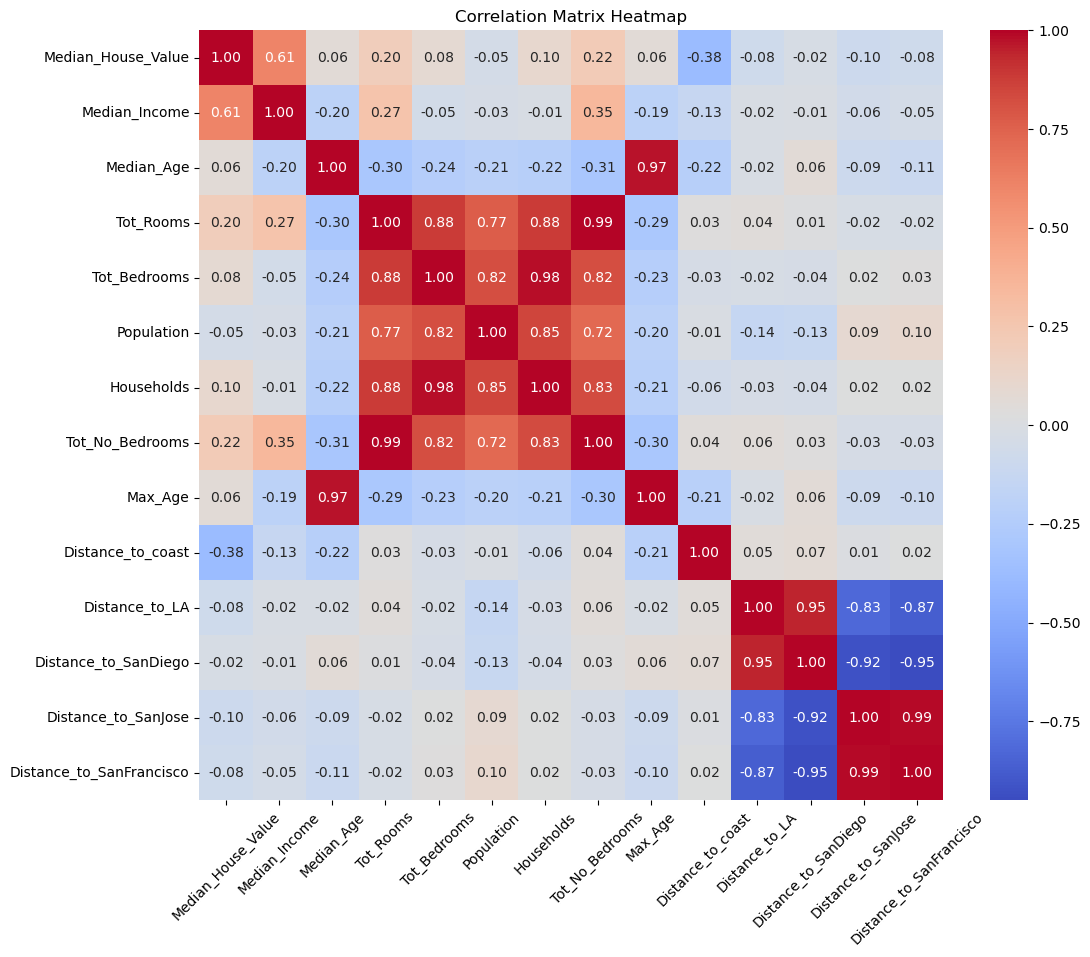

In [118]:
# We made a correlation matrix heatmap using seabon to understand the correlation between varibales.

import seaborn as sns

heatmap_cols=['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households',"Tot_No_Bedrooms","Max_Age","Distance_to_coast","Distance_to_LA","Distance_to_SanDiego","Distance_to_SanJose","Distance_to_SanFrancisco"]

correlation_matrix = df2[heatmap_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.show()


In [119]:
# Max age and median age are highly correlated that may be duplicated, due to its high correlation coefficient (0.97).
# With a similar obersvation, tot_rooms and tot_no_bedrooms are highly correlated too with a correlation coefficient of (0.99).
# Therefore, these 2 columns will be dropped (max age and tot_no_bedrooms)

df2.drop(columns=["Tot_No_Bedrooms","Max_Age"],inplace=True)

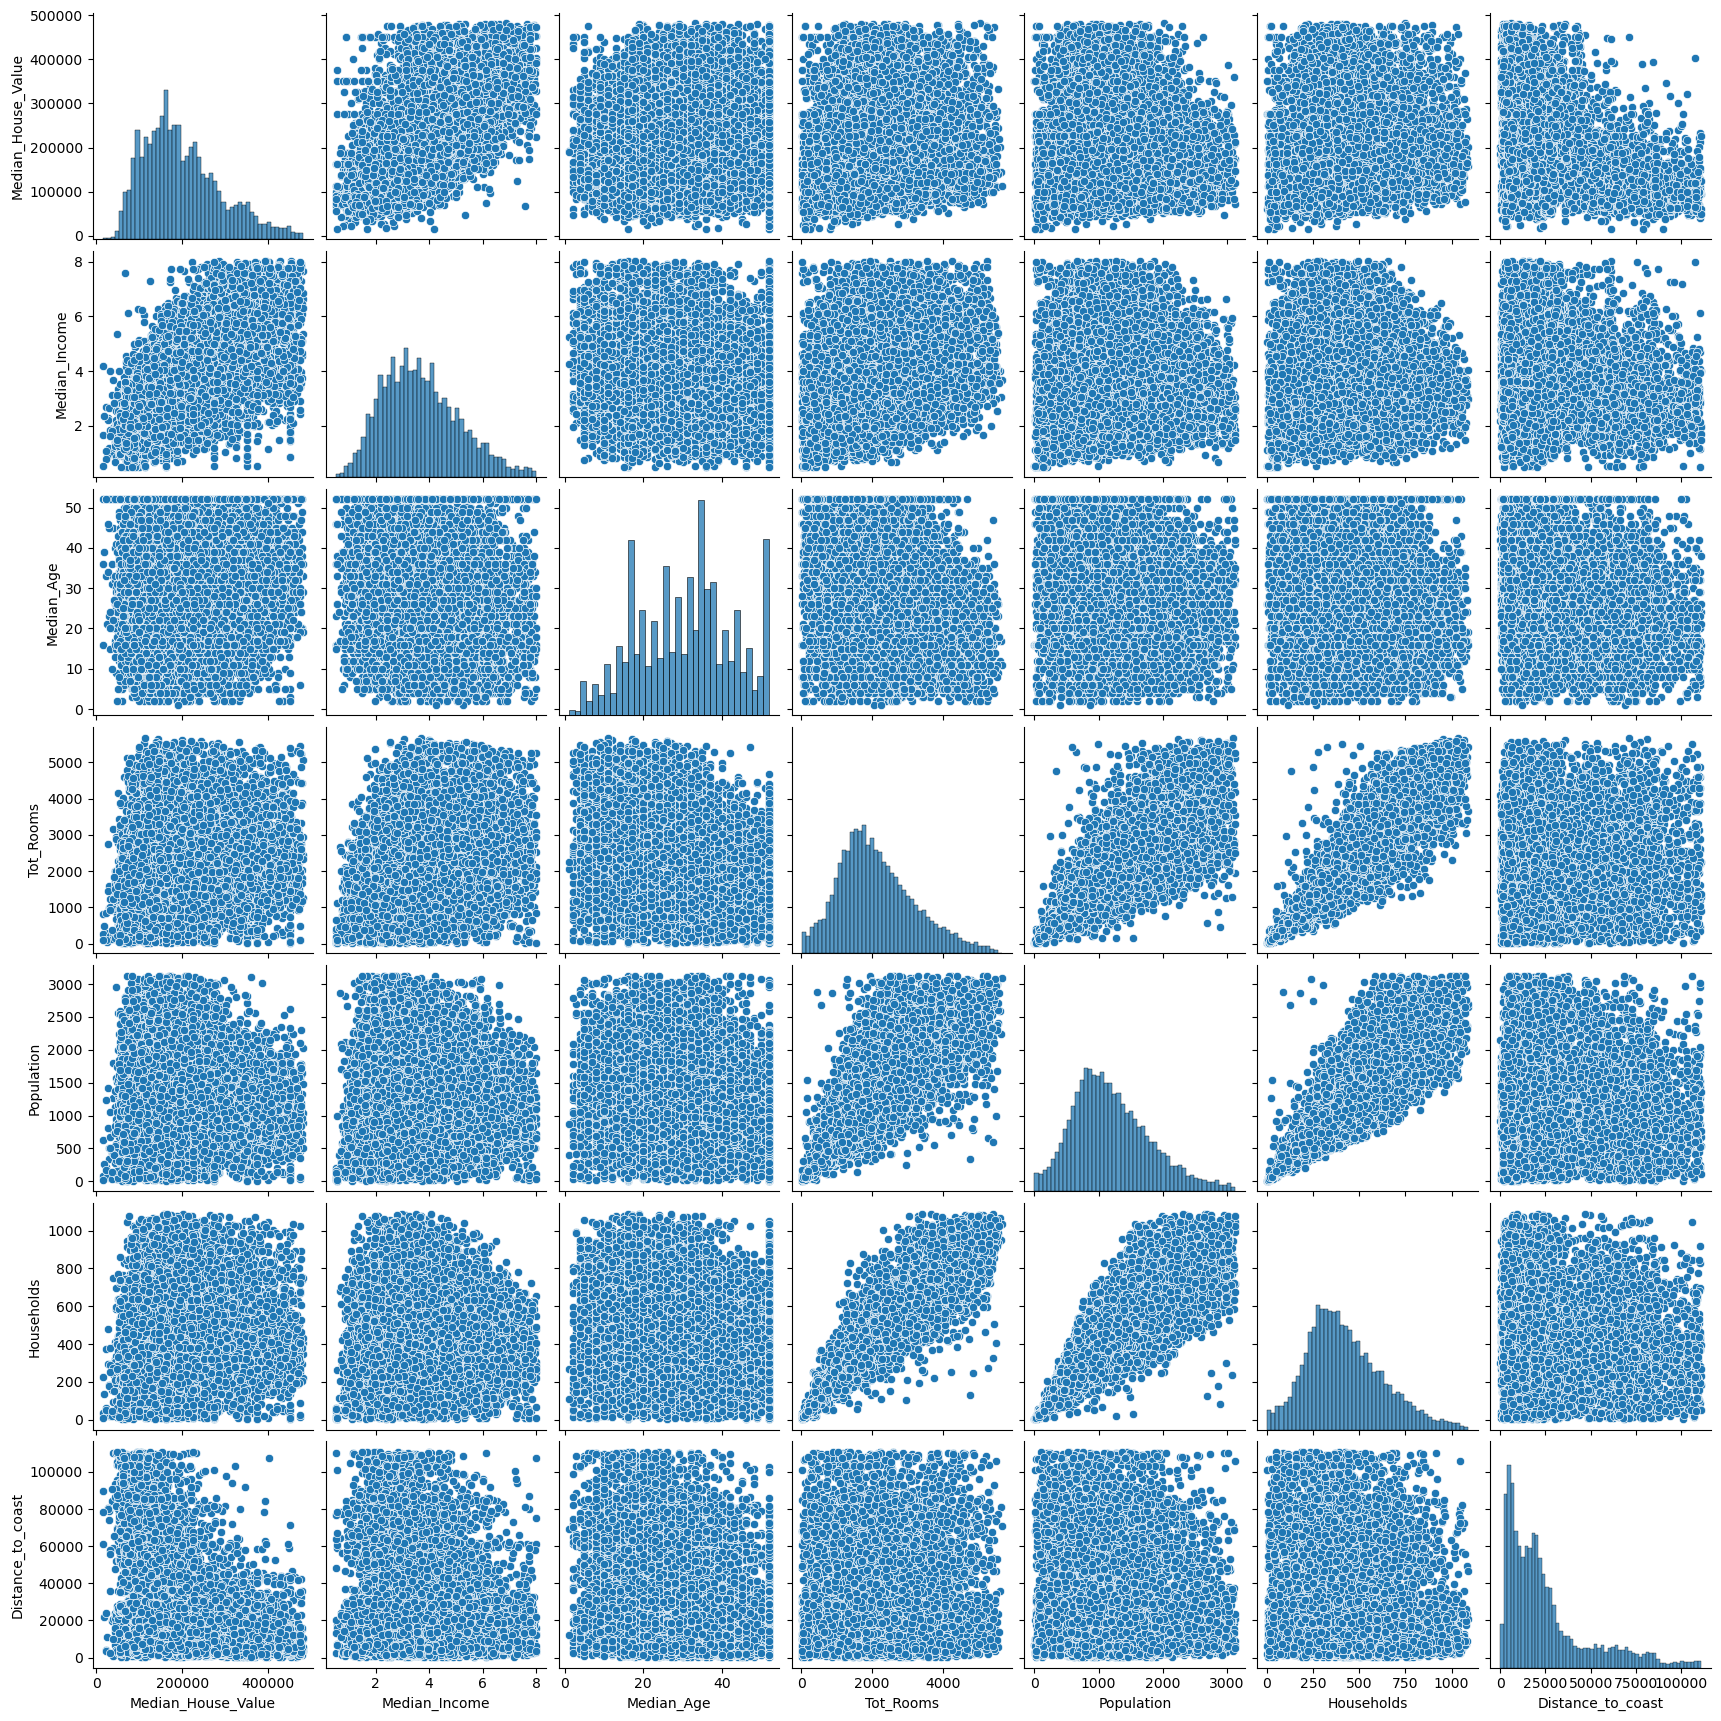

In [106]:
# The scatter plots correspond to the matrix above
# Median house value has a positive correlation with median income.

sns.pairplot(df2[['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Population', 'Households','Distance_to_coast']])
plt.show()

What are the predictors of \<Median_House_Value> worthy of interest and the nature of their relationship with the target ? <br>
**Provide the scatter plots of those predictors with the target**

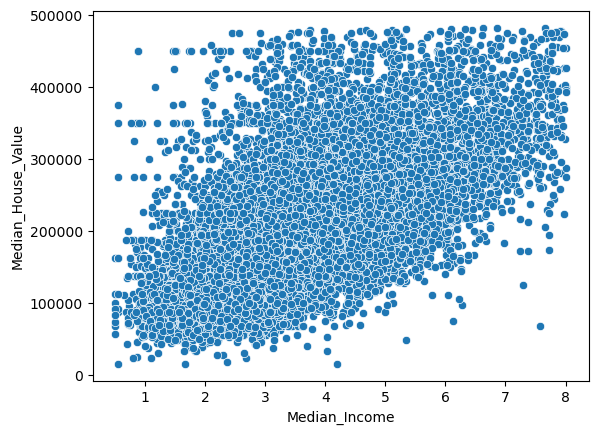

In [107]:
# We observed that the median house value has a positive correlation with median income (0.61).
sns.scatterplot(y=df2['Median_House_Value'],x= df2['Median_Income'])
plt.show()

**What special observations are you drawing from these scatter plots?**

Is the total number of rooms or bedrooms per district meaningful ? <br>
If so explain why, if not what are your suggestions ?

In [2]:
# Also from the scatter plots, we find out that the median income and distance to coast have more significant relationship with median house value.

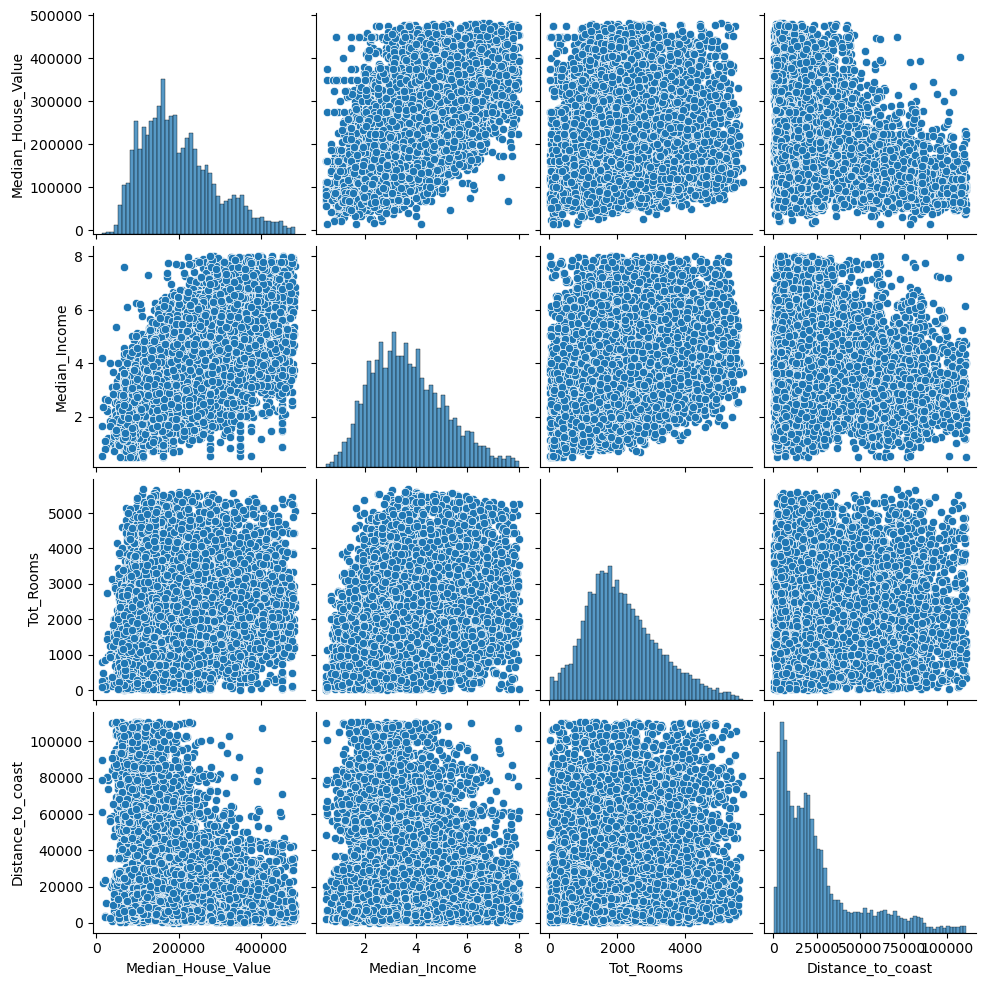

In [108]:
# It is not meaningful because it is not reflecting each house's characteristics.
# We suggest using the mean of the number of bedrooms to understand the average in correlation to the other variables, such as house value, income, population and household.

sns.pairplot(df2[['Median_House_Value', 'Median_Income', 'Tot_Rooms','Distance_to_coast']])
plt.show()

## Explore new variables

**Create three new variables :**
1. Rooms per household
2. Bedrooms per rooms
4. People per household

**Let us again look at the correlation between the predictors and the target**

What is your conclusion?

Do not forget to save your dataset!

In [120]:
# In the last session, we define a new variable df3 for work.

df3=df2.copy()

In [121]:
# Three new variables are created as instructed.

df3['Rooms_per_household'] = df3['Tot_Rooms'] / df3['Households']
df3['Bedrooms_per_rooms'] = df3['Tot_Bedrooms'] / df3['Tot_Rooms']
df3['People_per_household'] = df3['Population'] / df3['Households']

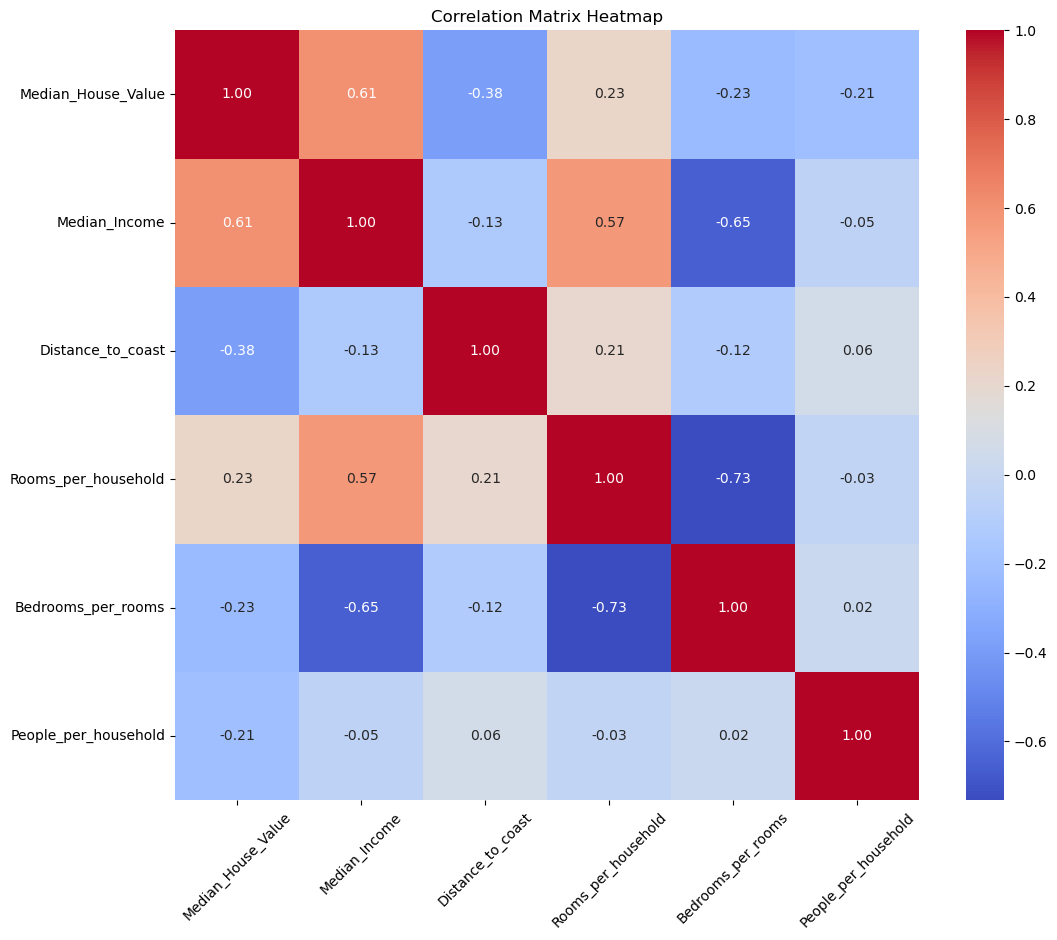

In [124]:
# The correlation between the median house value and rooms per household becomes slightly stronger with a weak positive correlation.
# The correlation betwene the median house value and bedrooms per rooms is weakly and negatively correlated.
# The correlation betwene the median house value and people_per_household is weakly and negatively correlated.

heatmap_new_cols=['Median_House_Value', 'Median_Income',"Distance_to_coast","Rooms_per_household",'Bedrooms_per_rooms','People_per_household']

correlation_matrix = df3[heatmap_new_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.show()